In [1]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf
tf.enable_eager_execution()

import librosa
import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
import pandas as pd
import librosa
import simpleaudio as sa
from IPython import display

print("Finished imports")

C:\Users\1002983\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Finished imports


dict_keys(['audio', 'qualities', 'qualities_str', 'instrument', 'instrument_family', 'instrument_family_str', 'instrument_source', 'instrument_source_str', 'instrument_str', 'note', 'note_str', 'pitch', 'sample_rate', 'velocity'])
tf.Tensor(b'instrumentbass_synthetic_033', shape=(), dtype=string)
tf.Tensor(100, shape=(), dtype=int64)
First audio playback done
tf.Tensor(16000, shape=(), dtype=int64)
<class 'numpy.int64'>
[4913 4742 4597 4493 4420 4364 4302 4247 4229 4265]
[4913 4742 4597 4493 4420 4364 4302 4247 4229 4265]
True
Done


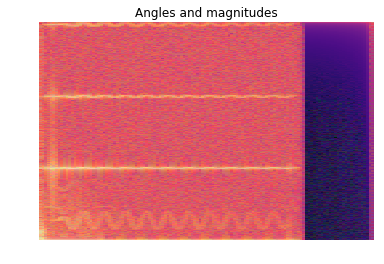

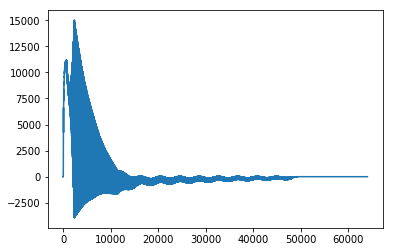

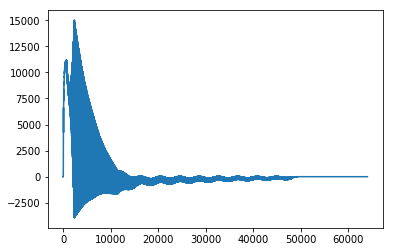

In [60]:
# nsynth = tf.data.Dataset.from_tensor_slices(tf.data.TFRecordDataset("nsynth-test.tfrecord")).shuffle()]
nsynth = tf.data.TFRecordDataset("nsynth-test.tfrecord")
i = 1
numTrue = 0
read_features = {
    'note': tf.FixedLenFeature([], dtype=tf.int64),
    'note_str': tf.FixedLenFeature([], dtype=tf.string),
    'instrument': tf.FixedLenFeature([], dtype=tf.int64),
    'instrument_str': tf.FixedLenFeature([], dtype=tf.string),
    'pitch': tf.FixedLenFeature([], dtype=tf.int64),
    'velocity': tf.FixedLenFeature([], dtype=tf.int64),
    'sample_rate': tf.FixedLenFeature([], dtype=tf.int64),
    'audio': tf.VarLenFeature(dtype=float),
    'qualities': tf.VarLenFeature(dtype=tf.int64),
    'qualities_str': tf.VarLenFeature(dtype=tf.string),
    'instrument_family': tf.FixedLenFeature([], dtype=tf.int64),
    'instrument_family_str': tf.FixedLenFeature([], dtype=tf.string),
    'instrument_source': tf.FixedLenFeature([], dtype=tf.int64),
    'instrument_source_str': tf.FixedLenFeature([], dtype=tf.string)
}
for b in nsynth:
    if(i==1):
        """read_data = tf.parse_single_example(serialized=b, features=read_features)
        audio = read_data['audio'].values.numpy()*15000
        spectrogram = librosa.stft(audio, 2048)
        magnitudes = np.log(np.abs(spectrogram))
        phases = np.angle(spectrogram)
        new_spectrogram = np.exp(magnitudes + 1j*phases)
        new_audio = librosa.istft(new_spectrogram, 512, 2048)
        if(np.allclose(audio, new_audio, atol=0.5)):
            numTrue += 1
        print("{}/{}".format(numTrue, i), end="\r")
        i += 1
        continue"""
        
        read_data = tf.parse_single_example(serialized=b, features=read_features)
        print(read_data.keys())
        print('instrument'+read_data['instrument_str'])
        print(read_data['pitch'])
        audio = read_data['audio'].values.numpy()*15000
        playAudio(audio, read_data['sample_rate'].numpy())
        print('First audio playback done')
        spectrogram = librosa.stft(audio, 2048)
        magnitudes = np.log(np.abs(spectrogram))
        phases = np.angle(spectrogram)
        plt.imshow(phases, zorder=1, cmap="hsv", origin="lower", aspect="auto")
        plt.imshow(magnitudes, zorder=2, alpha=0.9, cmap="magma", origin="lower", aspect="auto")
        plt.axis('off')
        plt.title('Angles and magnitudes')
        plt.figure(3)
        plt.plot(audio)
        new_spectrogram = np.exp(magnitudes + 1j*phases)
        new_audio = librosa.istft(new_spectrogram, 512, 2048)
        print(read_data['sample_rate'])
        print(type(read_data['sample_rate'].numpy()))
        plt.figure(2)
        plt.plot(new_audio)
        playAudio(new_audio, read_data['sample_rate'].numpy())
        print(audio.astype(np.int16)[100:110])
        print(new_audio.astype(np.int16)[100:110])
        print(np.allclose(audio, new_audio, atol=0.5))
        print('Done')
        #print(read_data['audio'].reshape((64000,)).eval())
    i += 1

In [58]:
def playAudio(audio, sr):
    audio = audio.astype(np.int16)
    play_obj = sa.play_buffer(audio, 1, 2, sr)
    play_obj.wait_done()

##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License").

# DCGAN: An example with tf.keras and eager

<table class="tfo-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank"  href="https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

This notebook demonstrates how to generate images of handwritten digits using [tf.keras](https://www.tensorflow.org/programmers_guide/keras) and [eager execution](https://www.tensorflow.org/programmers_guide/eager). To do so, we use Deep Convolutional Generative Adverserial Networks ([DCGAN](https://arxiv.org/pdf/1511.06434.pdf)).

This model takes about ~30 seconds per epoch (using tf.contrib.eager.defun to create graph functions) to train on a single Tesla K80 on Colab, as of July 2018.

Below is the output generated after training the generator and discriminator models for 150 epochs.

![sample output](https://tensorflow.org/images/gan/dcgan.gif)

In [ ]:
# to generate gifs
!pip install imageio

## Import TensorFlow and enable eager execution

## Load the dataset

We are going to use the MNIST dataset to train the generator and the discriminator. The generator will then generate handwritten digits.

In [ ]:
# Use inside a Kaggle kernel
dataset = pd.read_csv("../input/fashion-mnist_train.csv")
datasetTest = pd.read_csv("../input/fashion-mnist_test.csv")
train_images = dataset[dataset.columns[1:785]].append(datasetTest[datasetTest.columns[1:785]]).values

# Use outside of Kaggle
# (train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

print("Done")

In [ ]:
train_images = tf.constant(train_images, shape = [70000, 784])
train_images = tf.cast(tf.reshape(train_images, (train_images.shape[0], 28, 28, 1)),'float32')
# We are normalizing the images to the range of [-1, 1]
train_images = (train_images - 127.5) / 127.5

In [ ]:
BUFFER_SIZE = 70000
BATCH_SIZE = 256

## Use tf.data to create batches and shuffle the dataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Write the generator and discriminator models

* **Generator** 
  * It is responsible for **creating convincing images that are good enough to fool the discriminator**.
  * It consists of Conv2DTranspose (Upsampling) layers. We start with a fully connected layer and upsample the image 2 times so as to reach the desired image size (mnist image size) which is (28, 28, 1). 
  * We use **leaky relu** activation except for the **last layer** which uses **tanh** activation.
  
* **Discriminator**
  * **The discriminator is responsible for classifying the fake images from the real images.**
  * In other words, the discriminator is given generated images (from the generator) and the real MNIST images. The job of the discriminator is to classify these images into fake (generated) and real (MNIST images).
  * **Basically the generator should be good enough to fool the discriminator that the generated images are real**.

In [ ]:
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = tf.keras.layers.Dense(7*7*64, use_bias=False)
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
    
        self.conv1 = tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)
        self.batchnorm2 = tf.keras.layers.BatchNormalization()
    
        self.conv2 = tf.keras.layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False)
        self.batchnorm3 = tf.keras.layers.BatchNormalization()
    
        self.conv3 = tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False)

    def call(self, x, training=True):
        x = self.fc1(x)
        x = self.batchnorm1(x, training=training)
        x = tf.nn.relu(x)

        x = tf.reshape(x, shape=(-1, 7, 7, 64))

        x = self.conv1(x)
        x = self.batchnorm2(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.batchnorm3(x, training=training)
        x = tf.nn.relu(x)

        x = tf.nn.tanh(self.conv3(x))  
        return x

In [ ]:
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')
        self.conv2 = tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(1)

    def call(self, x, training=True):
        x = tf.nn.leaky_relu(self.conv1(x))
        x = self.dropout(x, training=training)
        x = tf.nn.leaky_relu(self.conv2(x))
        x = self.dropout(x, training=training)
        x = self.flatten(x)
        x = self.fc1(x)
        return x

In [ ]:
generator = Generator()
discriminator = Discriminator()

In [ ]:
# Defun gives 10 secs/epoch performance boost
generator.call = tf.contrib.eager.defun(generator.call)
discriminator.call = tf.contrib.eager.defun(discriminator.call)
print("Done")

## Define the loss functions and the optimizer

* **Discriminator loss**
  * The discriminator loss function takes 2 inputs; **real images, generated images**
  * real_loss is a sigmoid cross entropy loss of the **real images** and an **array of ones (since these are the real images)**
  * generated_loss is a sigmoid cross entropy loss of the **generated images** and an **array of zeros (since these are the fake images)**
  * Then the total_loss is the sum of real_loss and the generated_loss
  
* **Generator loss**
  * It is a sigmoid cross entropy loss of the generated images and an **array of ones**
  

* The discriminator and the generator optimizers are different since we will train them separately.

In [ ]:
def discriminator_loss(real_output, generated_output):
    # [1,1,...,1] with real output since it is true and we want
    # our generated examples to look like it
    real_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.ones_like(real_output), logits=real_output)

    # [0,0,...,0] with generated images since they are fake
    generated_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.zeros_like(generated_output), logits=generated_output)

    total_loss = real_loss + generated_loss

    return total_loss

In [ ]:
def generator_loss(generated_output):
    return tf.losses.sigmoid_cross_entropy(tf.ones_like(generated_output), generated_output)

In [ ]:
discriminator_optimizer = tf.train.AdamOptimizer(1e-4)
generator_optimizer = tf.train.AdamOptimizer(1e-4)

## Checkpoints (Object-based saving)

In [ ]:
# checkpoint_dir = './training_checkpoints'
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
# checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
#                                  discriminator_optimizer=discriminator_optimizer,
#                                  generator=generator,
#                                  discriminator=discriminator)

## Training

* We start by iterating over the dataset
* The generator is given **noise as an input** which when passed through the generator model will output a image looking like a handwritten digit
* The discriminator is given the **real MNIST images as well as the generated images (from the generator)**.
* Next, we calculate the generator and the discriminator loss.
* Then, we calculate the gradients of loss with respect to both the generator and the discriminator variables (inputs) and apply those to the optimizer.

## Generate Images

* After training, its time to generate some images!
* We start by creating noise array as an input to the generator
* The generator will then convert the noise into handwritten images.
* Last step is to plot the predictions and **voila!**

In [ ]:
EPOCHS = 150
noise_dim = 100
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement of the gan.
random_vector_for_generation = tf.random_normal([num_examples_to_generate,
                                                 noise_dim])

In [ ]:
def generate_and_save_images(model, epoch, test_input):
    # make sure the training parameter is set to False because we
    # don't want to train the batchnorm layer when doing inference.
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
def train(dataset, epochs, noise_dim):  
    for epoch in range(epochs):
        start = time.time()
    
        for images in dataset:
            # generating noise from a uniform distribution
            noise = tf.random_normal([BATCH_SIZE, noise_dim])

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)

                real_output = discriminator(images, training=True)
                generated_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(generated_output)
                disc_loss = discriminator_loss(real_output, generated_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.variables))

        if epoch % 1 == 0:
            display.clear_output(wait=True)
            generate_and_save_images(generator,
                                   epoch + 1,
                                   random_vector_for_generation)

        # saving (checkpoint) the model every 15 epochs
        #if (epoch + 1) % 15 == 0:
            #checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time taken for epoch {} is {} sec'.format(epoch + 1,
                                                          time.time()-start))
  # generating after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           random_vector_for_generation)

In [ ]:
print("Start training")
train(train_dataset, EPOCHS, noise_dim)

## Restore the latest checkpoint

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
# checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Display an image using the epoch number

In [ ]:
# def display_image(epoch_no):
#     return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
# display_image(EPOCHS)

## Generate a GIF of all the saved images.

<!-- TODO(markdaoust): Remove the hack when Ipython version is updated -->


In [ ]:
"""
with imageio.get_writer('dcgan.gif', mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
    
# this is a hack to display the gif inside the notebook
os.system('cp dcgan.gif dcgan.gif.png')
"""

In [ ]:
# display.Image(filename="dcgan.gif.png")

To downlod the animation from Colab uncomment the code below:

In [ ]:
#from google.colab import files
#files.download('dcgan.gif')